In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import linear_model as lm
from sklearn import svm
import sklearn.neural_network as nn
from sklearn import ensemble as en
from sklearn import neighbors as nb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import splashback as sp

In [2]:
#read in data
macsis = sp.macsis()
ceagle = sp.ceagle()

N_macsis = 390
N_ceagle = 30

N_bins = 40
log_radii = np.linspace(-1, 0.6, N_bins+1)
rad_mid = (10**log_radii[1:] + 10**log_radii[:-1]) / 2

In [3]:
#calculate splashback radii in 2D
macsis.RSP_DM = sp.R_SP_finding(rad_mid, macsis.DM_median)
macsis.RSP_EM = sp.R_SP_finding(rad_mid, macsis.EM_median)
macsis.RSP_SD = sp.R_SP_finding(rad_mid, macsis.SD_median)
macsis.RSP_SZ = sp.R_SP_finding(rad_mid, macsis.SZ_median)

ceagle.RSP_DM = sp.R_SP_finding(rad_mid, ceagle.DM_median)
ceagle.RSP_EM = sp.R_SP_finding(rad_mid, ceagle.EM_median)
ceagle.RSP_SD = sp.R_SP_finding(rad_mid, ceagle.SD_median)
ceagle.RSP_SZ = sp.R_SP_finding(rad_mid, ceagle.SZ_median)

In [4]:
#make ML data set
X = np.vstack((macsis.DM_median, macsis.EM_median, macsis.SD_median, macsis.SZ_median))
y = np.hstack((macsis.RSP_DM, macsis.RSP_EM, macsis.RSP_SD, macsis.RSP_SZ))

#ceagle_X = np.vstack((ceagle.DM_median, ceagle.EM_median, ceagle.SD_median, ceagle.SZ_median))
#ceagle_y = np.hstack((ceagle.RSP_DM, ceagle.RSP_EM, ceagle.RSP_SD, ceagle.RSP_SZ))

#X = np.vstack((macsis_X, ceagle_X))
#y = np.hstack((macsis_y, ceagle_y))

#X = macsis.SZ_median
#y = macsis.RSP_SZ

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
kf = KFold(n_splits=10, shuffle=True)

# Model testing

# Linear models

In [11]:
OLR = lm.LinearRegression()
scatter_OLR = cross_val_score(OLR, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_OLR = np.mean(scatter_OLR)
std_OLR = np.std(scatter_OLR)
print(mean_OLR, std_OLR)

-0.0871300143116599 0.0071751317930684065


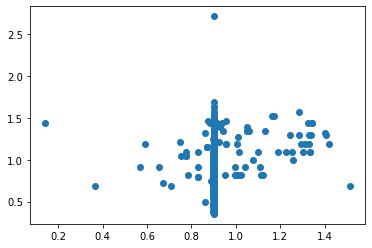

In [12]:
OLR = OLR.fit(X_train, y_train)
y_predict = OLR.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()

In [13]:
RR = lm.Ridge(alpha=0.15)
scatter_RR = cross_val_score(RR, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_RR = np.mean(scatter_RR)
std_RR = np.std(scatter_RR)
print(mean_RR, std_RR)

-0.0869421381625211 0.008596469838210942


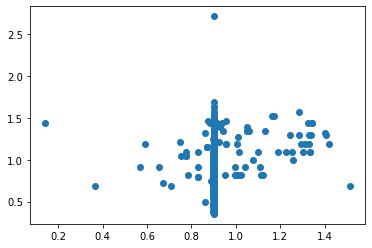

In [14]:
RR = RR.fit(X_train, y_train)
y_predict = RR.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()

In [15]:
Lss = lm.Lasso(alpha=0.15)
scatter_Lss = cross_val_score(Lss, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_Lss = np.mean(scatter_Lss)
std_Lss = np.std(scatter_Lss)
print(mean_Lss, std_Lss)

-0.08539730912875729 0.0044663887212558024


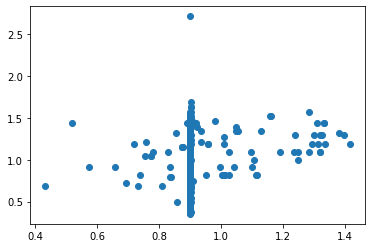

In [16]:
Lss = Lss.fit(X_train, y_train)
y_predict = Lss.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()

# Support vector machines

In [17]:
SVR = svm.SVR()
scatter_SVR = cross_val_score(SVR, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_SVR = np.mean(scatter_SVR)
std_SVR = np.std(scatter_SVR)
print(mean_SVR, std_SVR)

-0.07889710234477756 0.007105738073938845


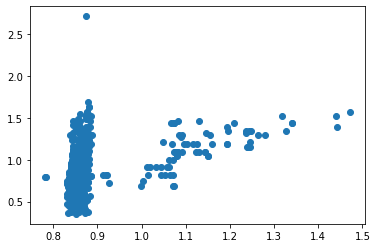

In [18]:
SVR = SVR.fit(X_train, y_train)
y_predict = SVR.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()

# Decision trees

In [19]:
DTreg = tree.DecisionTreeRegressor(max_depth=15)
kf = KFold(n_splits=10, shuffle=True)

scatter_DTreg = cross_val_score(DTreg, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_DTreg = np.mean(scatter_DTreg)
std_DTreg = np.std(scatter_DTreg)
print(mean_DTreg, std_DTreg)

-0.043310405418827025 0.006828878437005045


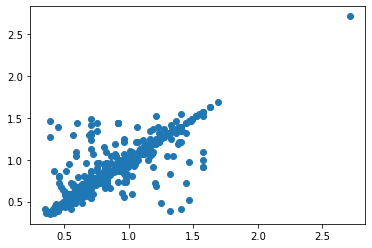

In [20]:
DTreg = DTreg.fit(X_train, y_train)
y_predict = DTreg.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()

In [21]:
GBDT = en.GradientBoostingRegressor(max_depth=5)
scatter_GBDT = cross_val_score(GBDT, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_GBDT = np.mean(scatter_GBDT)
std_GBDT = np.std(scatter_GBDT)
print(mean_GBDT, std_GBDT)

-0.027473954192909805 0.002603335553454054


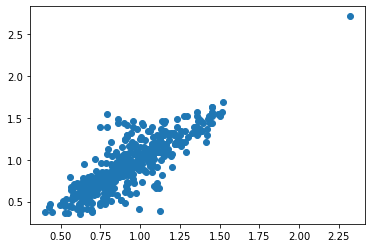

In [22]:
GBDT = GBDT.fit(X_train, y_train)
y_predict = GBDT.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()

In [23]:
ADT = en.AdaBoostRegressor()
scatter_ADT = cross_val_score(ADT, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_ADT = np.mean(scatter_ADT)
std_ADT = np.std(scatter_ADT)
print(mean_ADT, std_ADT)

-0.06763654903396846 0.0016312584821364443


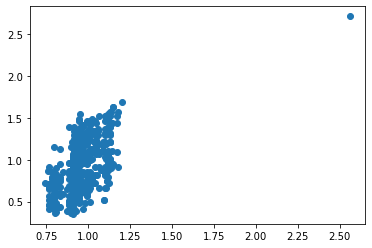

In [24]:
ADT = ADT.fit(X_train, y_train)
y_predict = ADT.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()

In [57]:
RF = en.RandomForestRegressor()
scatter_RF = cross_val_score(RF, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_RF = np.mean(scatter_RF)
std_RF = np.std(scatter_RF)
print(mean_RF, std_RF)

-0.021484658390209816 0.003047352080278662


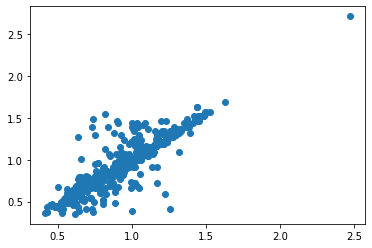

In [58]:
RF = RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()

# Neural networks

In [25]:
NN = nn.MLPRegressor()
scatter_NN = cross_val_score(NN, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_NN = np.mean(scatter_NN)
std_NN = np.std(scatter_NN)
print(mean_NN, std_NN)

-822.9842554000512 716.1059816925197


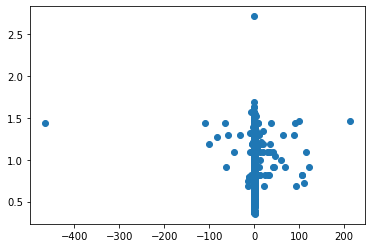

In [26]:
NN = NN.fit(X_train, y_train)
y_predict = NN.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()

# Nearest neighbours

In [55]:
kNN = nb.KNeighborsRegressor(n_neighbors=9, weights="distance")
scatter_kNN = cross_val_score(kNN, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_kNN = np.mean(scatter_kNN)
std_kNN = np.std(scatter_kNN)
print(mean_kNN, std_kNN)

-0.027640777243470898 0.0022984416438732993


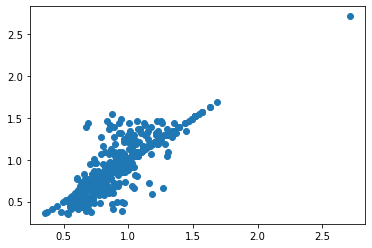

0.727926960789247


In [56]:
kNN = kNN.fit(X_train, y_train)
y_predict = kNN.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()
print(metrics.r2_score(y_test, y_predict))

In [46]:
RNN = nb.RadiusNeighborsRegressor(radius=4, weights="distance")
#scatter_RNN = cross_val_score(RNN, X, y, cv=kf, scoring='neg_mean_squared_error')
#mean_RNN = np.nanmean(scatter_RNN)
#std_RNN = np.nanstd(scatter_RNN)
#print(mean_RNN, std_RNN)

C:\Work\Anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


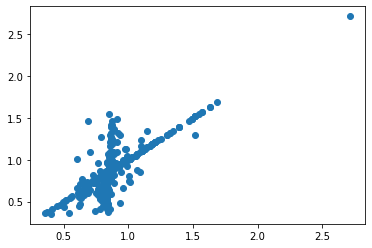

468
164
0.6557830679129919


In [51]:
RNN = RNN.fit(X_train, y_train)
y_predict = RNN.predict(X_test)
plt.scatter(y_predict, y_test)
plt.show()

print(len(y_predict))
print(len(y_predict[np.isnan(y_predict)]))
inc = np.isfinite(y_predict)
print(metrics.r2_score(y_test[inc], y_predict[inc]))